# 단순 선형회귀

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터: Galton - 아버지와 아들의 키 

In [ ]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
print(df.shape)
df.head()

(898, 6)


,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬럼명을 'Father', 'Son' 으로 변경
- 단위 변경 (inch -> centi)

In [ ]:
df.Gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df[['Father', 'Height']]

,Father,Height
0,78.5,73.2
1,78.5,69.2
2,78.5,69.0
3,78.5,69.0
4,75.5,73.5
...,...,...
893,68.5,68.5
894,68.5,67.7
895,68.5,64.0
896,68.5,63.5


In [ ]:
# 내가한 방법 ( ु ´͈ ᵕ `͈ )ु
df_fs = df[df['Gender']=='M'][['Father', 'Height']] * 2.54  # *2.54 : inch -> cm 변경 
df_fs.columns=['Father', 'Son']
df_fs.reset_index(drop=True, inplace = True)
print(df_fs.shape )
df_fs.head()

(465, 2)


,Father,Son
0,199.39,185.928
1,191.77,186.690
2,191.77,184.150
3,190.50,180.340
4,190.50,179.070


In [ ]:
# 강사님 방법 

df = df[df.Gender == 'M'] # Filtering: 아들의 키
df = df[['Father','Height']] # Selection
df.rename(columns={'Height':'Son'}, inplace=True) # 컬럼명 변경
# df.columns = ['Father','Son']
df = df * 2.54 # 단위 변경
df.head()

199.39000000000001

- 산점도 그리기

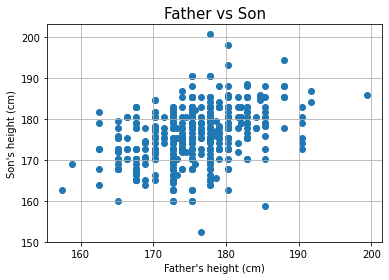

In [ ]:
# X: 독립변수 ('Father')
# Y: 종속변수 ('Son')

plt.scatter(df_fs.Father, df_fs.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

- 회귀선 구하고 그리기
- 최소자승법:
 - `np.linalg.lstsq()`
 - `np.polyfit()`

In [ ]:
# 회귀선 구하기
# 최소자승법 -> numpy에 있음 

# y = weight * x + bias
# 1차 회귀식 
weight, bias = np.polyfit(df_fs.Father, df_fs.Son, 1) # deg=1 : 차수=1 의미
weight, bias

(0.447747917603028, 97.17763700739309)

In [ ]:
# 2차 회귀식
np.polyfit(df_fs.Father, df_fs.Son, 2) # 2차식
# , , 상수항의 계수

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [ ]:
# 그래프상 점 2개 알면 1차 선(기울기) 구할 수 있음
xs = np.array([156, 201])
ys = xs *  weight + bias 
ys

array([167.02631215, 187.17496845])

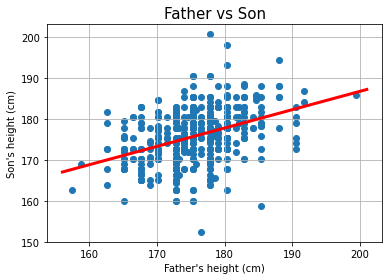

In [ ]:
# 산점도 차트 위에 회귀선 그리기
plt.scatter(df_fs.Father, df_fs.Son)
plt.plot(xs, ys, 'r-', lw =3 ) # lw =3: line width
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

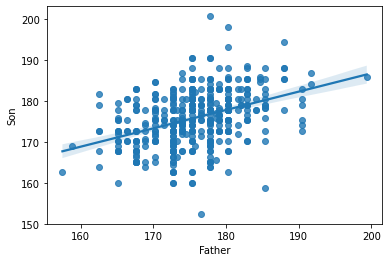

In [ ]:
# seaborn으로 그리기 (위에 방법보다 훨씬 쉬워,,,,,)
import seaborn as sns
sns.regplot(x='Father', y='Son', data=df_fs);
# 하늘색 영역: 신뢰 구간 

- Scikit_Learn으로 회귀식 구하기

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # random값 필요 없음 
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
df_fs.Father.shape

(465,)

In [ ]:
 # 회귀도 지도학습의 방법 중 하나
# 회귀식의 경우 train/test 나누지 않아도 돼
# 학습은 기본적으로 2차식 => shape 변경 필요

 # 방법 1 (DataFrame)
lr.fit(df_fs[['Father']], df_fs.Son) 

LinearRegression()

In [ ]:
# 방법 2 (numpy array)
lr.fit(df_fs.Father.values.reshape(-1,1), df_fs.Son.values)

LinearRegression()

In [ ]:
# 계수 (coefficient) = weight 
lr.coef_

array([0.44774792])

In [ ]:
# 절편 (intercept) = bias
lr.intercept_

97.17763700739341

In [ ]:
# 잔차 제곱의 합 (RSS: Residual Sum of Square)
lr._residues

17556.59951549399

- 평가 (R squared): 성능평가함수, 결정 계수

In [ ]:
## 평가 (R squared): 성능평가함수, 결정 계수
# 0<= R^2 <=1 
# 1에 가까울 수록 (회귀선에 모여있으면, 가깝다면) 설명력 높음 
# R^2 선형 회귀 선이 얼마나 잘 반영됬는지 -> 대표적인 평가 지표 
lr.score(df_fs.Father.values.reshape(-1,1), df_fs.Son.values)

0.15312927478307048

In [ ]:
# R squared (결정 계수)
from sklearn.metrics import r2_score 
X = df_fs.Father.values.reshape(-1,1)
y = df_fs.Son.values
#pred = lr.predict(df_fs.Father.values.reshape(-1,1), df_fs.Son.values)
pred = lr.predict(X)
r2_score(y, pred)

0.15312927478307048